In [1]:
## Rocket Python With Control Surfaces 
#### Enviroment Set Up

In [2]:
%reset
from rocketpy import *

Env = Environment(
    railLength=5.2, latitude=32.990254, longitude=-106.974998, elevation=1400
)
import datetime
#tomorrow = datetime.date.today() + datetime.timedelta(days=1)
#Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time
URL = "http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=02&FROM=0500&TO=0512&STNM=83779"
Env.setAtmosphericModel(type="WyomingSounding", file=URL)
#Env.setAtmosphericModel(type="Reanalysis", file="/data/weather/")
#Env.info()

#### Motor Setup


Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Propellant Exhaust Velocity: 2038.745 m/s
Average Thrust: 1545.218 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 6026.350 Ns

Plots


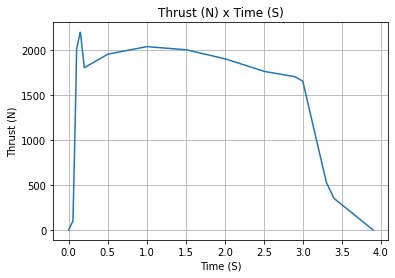

In [3]:

Pro75M1670 = SolidMotor(
    #thrustSource="../../data/motors/Cesaroni_M1670.eng",
    thrustSource="data/motors/Cesaroni_M1670.eng",
    burnOut=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
)

Pro75M1670.info()


#### Rocket Setup

In [4]:
Calisto = Rocket(
    motor=Pro75M1670,
    radius=127 / 2000,
    mass=19.197 - 2.956,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag="data/proxima/proxima.csv",
    powerOnDrag="data/proxima/proxima.csv",
)

Calisto.setRailButtons([0.2, -0.5])

NoseCone = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

FinSet = Calisto.addFins(
    4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956
)

Tail = Calisto.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)

#### Flight Data

13.378644518208034
-1343.310677740896
-0.0
268.6621355481792
13.990524241233857
-1343.0047378793831
-0.0
-0.061187972302559505
13.97931875938309
-1343.0103406203084
-0.0
0.001120548185053849
13.374127827881694
-1343.3129360860592
-0.0
0.060519093150151096
13.39091775374959
-1343.304541123125
-0.0
-0.0016789925868124556
13.851926685254966
-1343.0740366573725
-0.0
-0.04610089315051483
13.84351417307164
-1343.0782429134642
-0.0
0.0008412512183440413
14.79296977405636
-1342.6035151129718
-0.0
-0.09494556009849475
14.7690491847585
-1342.6154754076208
-0.0
0.002392058929808627
15.750926828092815
-1342.1245365859536
-0.0
-0.09818776433344284
15.725544863067967
-1342.137227568466
-0.0
0.002538196502473511
16.740011706331188
-1341.6299941468344
-0.0
-0.1014466843263108
16.713120734722338
-1341.6434396326388
-0.0
0.002689097160873644
28.775310814860177
-1335.61234459257
-0.0
-1.2062190080137498
28.332730758022194
-1335.833634620989
-0.0
0.044258005683786905
43.831745891667424
-1328.0841270541664

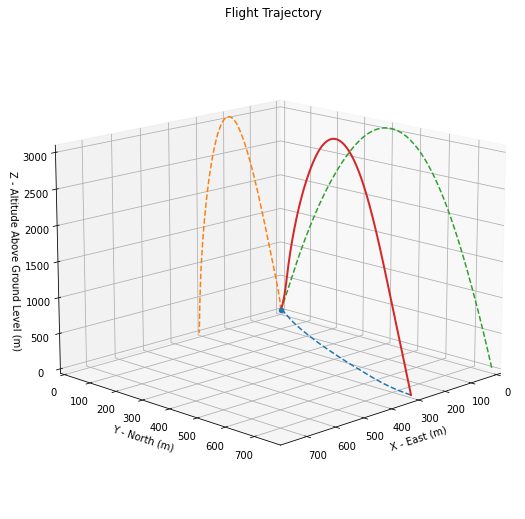



Fin Data



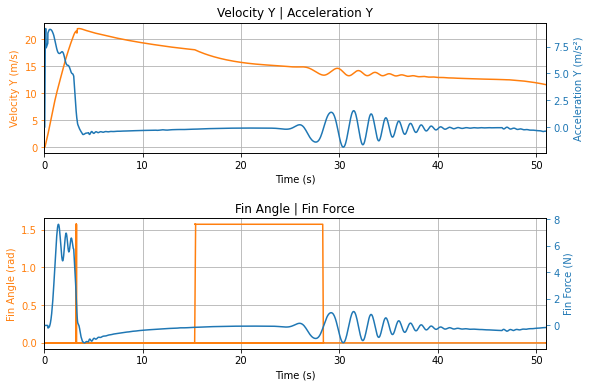



Trajectory Kinematic Plots



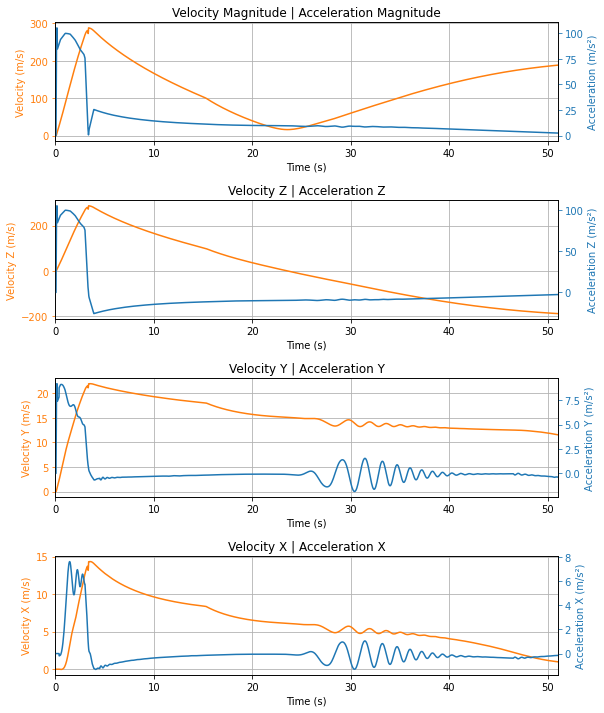



Angular Position Plots



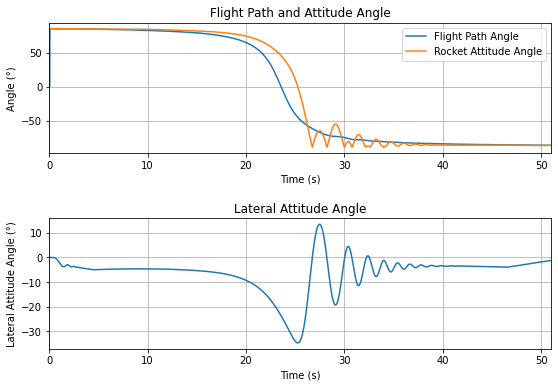



Path, Attitude and Lateral Attitude Angle plots



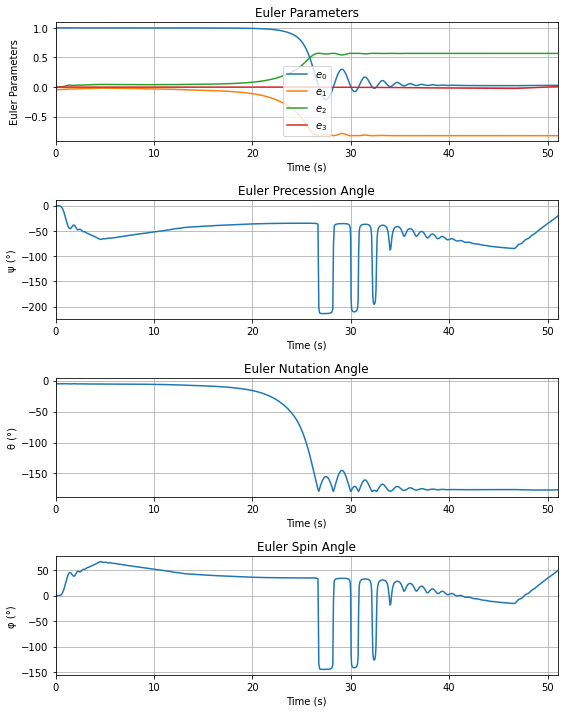



Trajectory Angular Velocity and Acceleration Plots



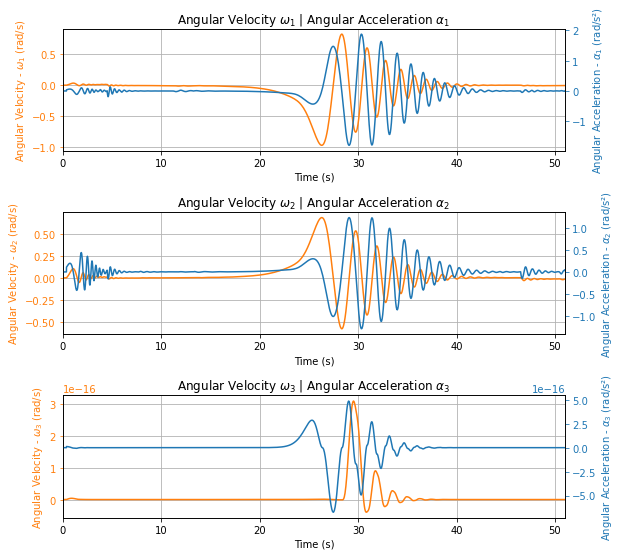



Trajectory Force Plots



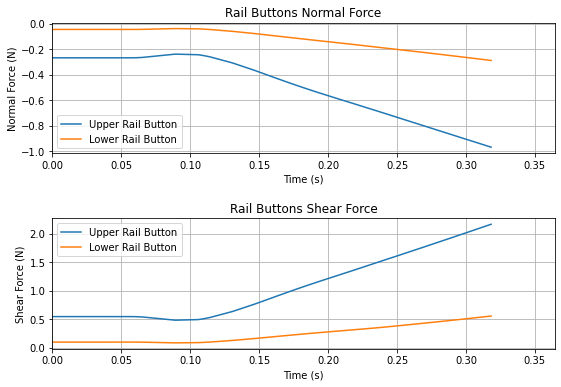

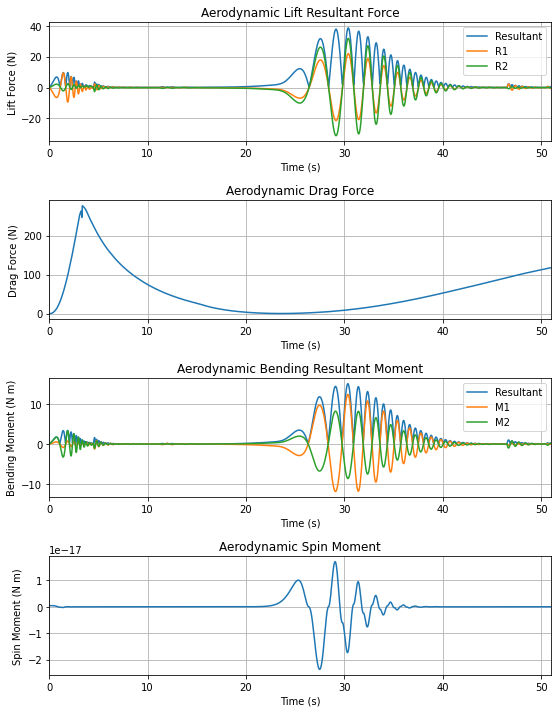



Trajectory Energy Plots



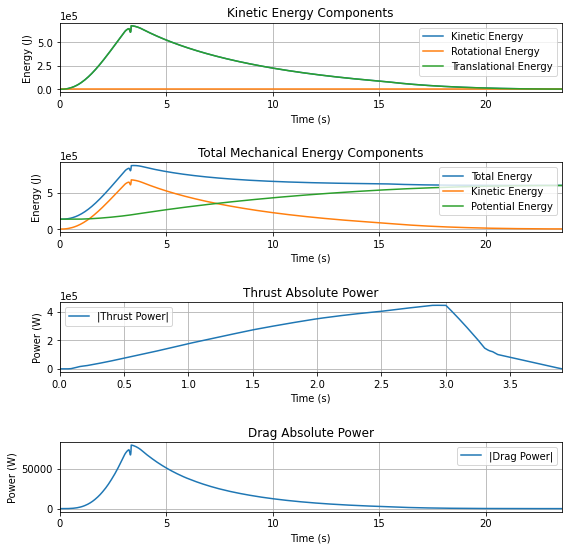



Trajectory Fluid Mechanics Plots



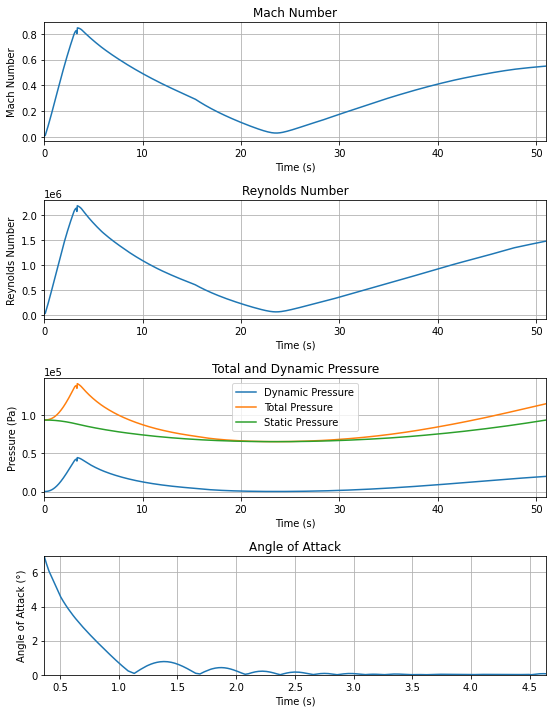



Trajectory Stability and Control Plots



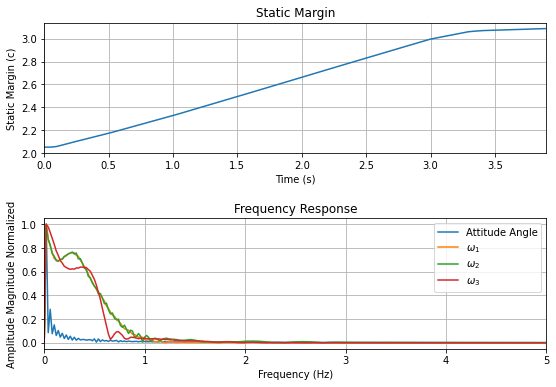

In [5]:
TestFlight = Flight(rocket=Calisto, environment=Env, inclination=85, heading=0, visualiseRocket=False)
#TestFlight.visualise()
TestFlight.allInfo()